In [3]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import model_selection

In [4]:

with pymysql.connect(
    host="localhost",
    user="pedro",
    password="12345",
    database="bank_db",
    charset='utf8mb4',
    cursorclass=pymysql.cursors.DictCursor
) as conn:
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM churners;')
    data = cursor.fetchall()

In [10]:
df = pd.DataFrame(data)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691,777,11914,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256,864,7392,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418,0,3418,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313,2517,796,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716,0,4716,2.175,816,28,2.500,0.000


In [11]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1,
                                                 'Existing Customer': 0})
df['Churn'] = df['Attrition_Flag']
df.drop(columns='Attrition_Flag', inplace=True)                                                 
                                                 

In [12]:
df

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691,777,11914,1.335,1144,42,1.625,0.061,0
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256,864,7392,1.541,1291,33,3.714,0.105,0
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418,0,3418,2.594,1887,20,2.333,0.000,0
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313,2517,796,1.405,1171,20,2.333,0.760,0
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716,0,4716,2.175,816,28,2.500,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,3,4003,1851,2152,0.703,15476,117,0.857,0.462,0
10123,710638233,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,3,4277,2186,2091,0.804,8764,69,0.683,0.511,1
10124,716506083,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,4,5409,0,5409,0.819,10291,60,0.818,0.000,1
10125,717406983,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,3,5281,0,5281,0.535,8395,62,0.722,0.000,1


In [13]:
df['Churn'].mean()

np.float64(0.1606596227905599)

In [14]:
features = df.columns[1:-1]
target = 'Churn'

In [15]:
X, y = df[features], df[target] 

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=0.2, 
                                                                    stratify=y,
                                                                    random_state=42)

In [17]:
print("Target proportion train:", y_train.mean())
print("Target proportion test:", y_test.mean())

Target proportion train: 0.1607208986544871
Target proportion test: 0.16041461006910168


In [18]:
X_train.isna().sum().sort_values(ascending=False)

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Bivariate Analysis - Feature Selection

In [19]:
X_explore = X_train.copy()
X_explore[target] =  y_train
X_explore

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
2856,36,F,0,Unknown,Married,Less than $40K,Blue,24,4,3,2,2570,2230,340,0.686,1755,42,0.448,0.868,0
6515,44,M,3,High School,Single,$60K - $80K,Silver,36,5,2,3,25276,0,25276,0.849,2282,38,0.583,0.000,1
7141,46,M,2,High School,Married,$80K - $120K,Blue,30,6,3,1,11670,915,10755,0.892,4277,89,0.854,0.078,0
632,36,F,2,Graduate,Married,Less than $40K,Blue,24,3,1,3,3124,1593,1531,0.869,1652,41,0.367,0.510,0
3496,50,M,1,Graduate,Single,$120K +,Blue,40,4,2,3,34516,1185,33331,0.725,3874,72,0.714,0.034,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6147,46,F,4,High School,Married,Unknown,Blue,30,3,1,3,5869,0,5869,0.852,5103,83,0.844,0.000,0
8858,52,F,1,High School,Married,Less than $40K,Blue,35,1,3,3,1959,1022,937,0.780,7847,65,0.857,0.522,0
3284,61,F,0,Graduate,Single,$40K - $60K,Blue,56,3,3,4,9721,0,9721,0.826,2260,46,1.000,0.000,1
7551,43,F,3,Graduate,Married,Less than $40K,Blue,34,6,2,1,2725,2517,208,0.482,4430,66,0.692,0.924,0


In [20]:
numerical_cols = X_explore.select_dtypes(include=np.number).columns.to_list()
summary_num = X_explore[numerical_cols].groupby(by=target).agg(['mean','median']).T
summary_num['rel_diff'] = summary_num[0]/summary_num[1]

summary_num.sort_values(by='rel_diff', ascending=False)

Churn                                      0            1  rel_diff
Avg_Utilization_Ratio    median     0.212000     0.000000       inf
Total_Revolving_Bal      median  1376.000000     0.000000       inf
Avg_Utilization_Ratio    mean       0.298408     0.156920  1.901658
Total_Revolving_Bal      mean    1263.072217   669.496160  1.886601
Total_Trans_Amt          median  4098.000000  2323.000000  1.764098
Total_Trans_Ct           median    71.000000    43.000000  1.651163
                         mean      68.550081    44.606759  1.536764
Total_Trans_Amt          mean    4645.956317  3041.365591  1.527589
Total_Ct_Chng_Q4_Q1      median     0.721000     0.529000  1.362949
                         mean       0.743790     0.554513  1.341338
Total_Relationship_Count median     4.000000     3.000000  1.333333
                         mean       3.916900     3.251920  1.204488
Credit_Limit             median  4642.000000  4171.000000  1.112923
Total_Amt_Chng_Q4_Q1     mean       0.772013     0.694873  1.111013
Credit_Limit             mean    8674.819385  8085.201997  1.072925
Total_Amt_Chng_Q4_Q1     median     0.742000     0.697500  1.063799
Months_on_book           median    36.000000    36.000000  1.000000
Avg_Open_To_Buy          mean    7411.747169  7415.705837  0.999466
Months_on_book           mean      35.977350    36.152842  0.995146
Customer_Age             mean      46.329901    46.705069  0.991967
Avg_Open_To_Buy          median  3450.000000  3498.500000  0.986137
Customer_Age             median    46.000000    47.000000  0.978723
Dependent_count          mean       2.331519     2.440860  0.955204
Months_Inactive_12_mon   mean       2.276364     2.711214  0.839611
Contacts_Count_12_mon    mean       2.356670     2.977727  0.791433
                         median     2.000000     3.000000  0.666667
Dependent_count          median     2.000000     3.000000  0.666667
Months_Inactive_12_mon   median     2.000000     3.000000  0.666667

In [21]:
categorical_cols = X_explore.select_dtypes(include='object').columns.to_list()

for col in categorical_cols:
    summary_cat = X_explore.groupby(by=col)[target].mean().sort_values(ascending=False)
    print(summary_cat,'\n')

Gender
F    0.175328
M    0.144424
Name: Churn, dtype: float64 

Education_Level
Doctorate        0.205056
Unknown          0.169843
Post-Graduate    0.168618
Uneducated       0.165680
High School      0.155152
Graduate         0.153908
College          0.148241
Name: Churn, dtype: float64 

Marital_Status
Unknown     0.178512
Single      0.169001
Married     0.153395
Divorced    0.145242
Name: Churn, dtype: float64 

Income_Category
$120K +           0.178571
Unknown           0.172686
Less than $40K    0.172316
$40K - $60K       0.151724
$80K - $120K      0.148056
$60K - $80K       0.138204
Name: Churn, dtype: float64 

Card_Category
Platinum    0.235294
Gold        0.191489
Blue        0.161132
Silver      0.143852
Name: Churn, dtype: float64 



In [22]:
numerical_cols.remove('Churn')

Feature Importance

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import tree

# Preprocessing: one-hot for categorical, passthrough for numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

tree_explore = tree.DecisionTreeClassifier(random_state=42, max_depth=5)

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', tree_explore)])

model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [26]:
feature_names = (model.named_steps['preprocessor']
                      .transformers_[0][1]
                      .get_feature_names_out(categorical_cols))
feature_names

array(['Gender_M', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'], dtype=object)

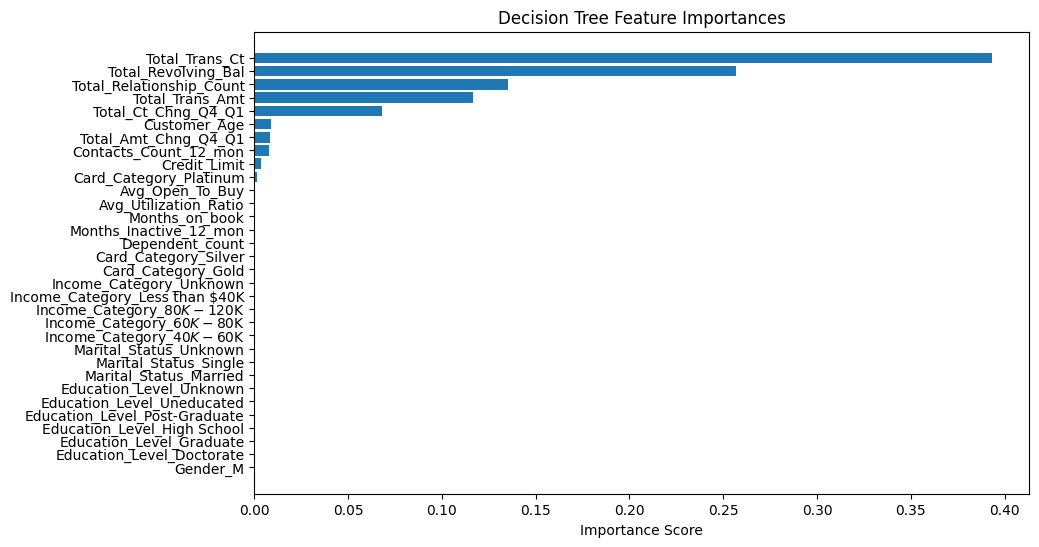

In [28]:
all_features = np.concatenate([feature_names, numerical_cols])

# Get feature importances from the tree
importances = model.named_steps['classifier'].feature_importances_

# Sort and plot
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), np.array(all_features)[indices])
plt.gca().invert_yaxis()
plt.title("Decision Tree Feature Importances")
plt.xlabel("Importance Score")
plt.show()


In [30]:
# Transform the training set
X_transformed = model.named_steps['preprocessor'].transform(X_train)

# Get the encoded feature names
cat_features = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_features = np.concatenate([cat_features, numerical_cols])

# Convert to DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=all_features)


In [38]:
numerical_cols

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

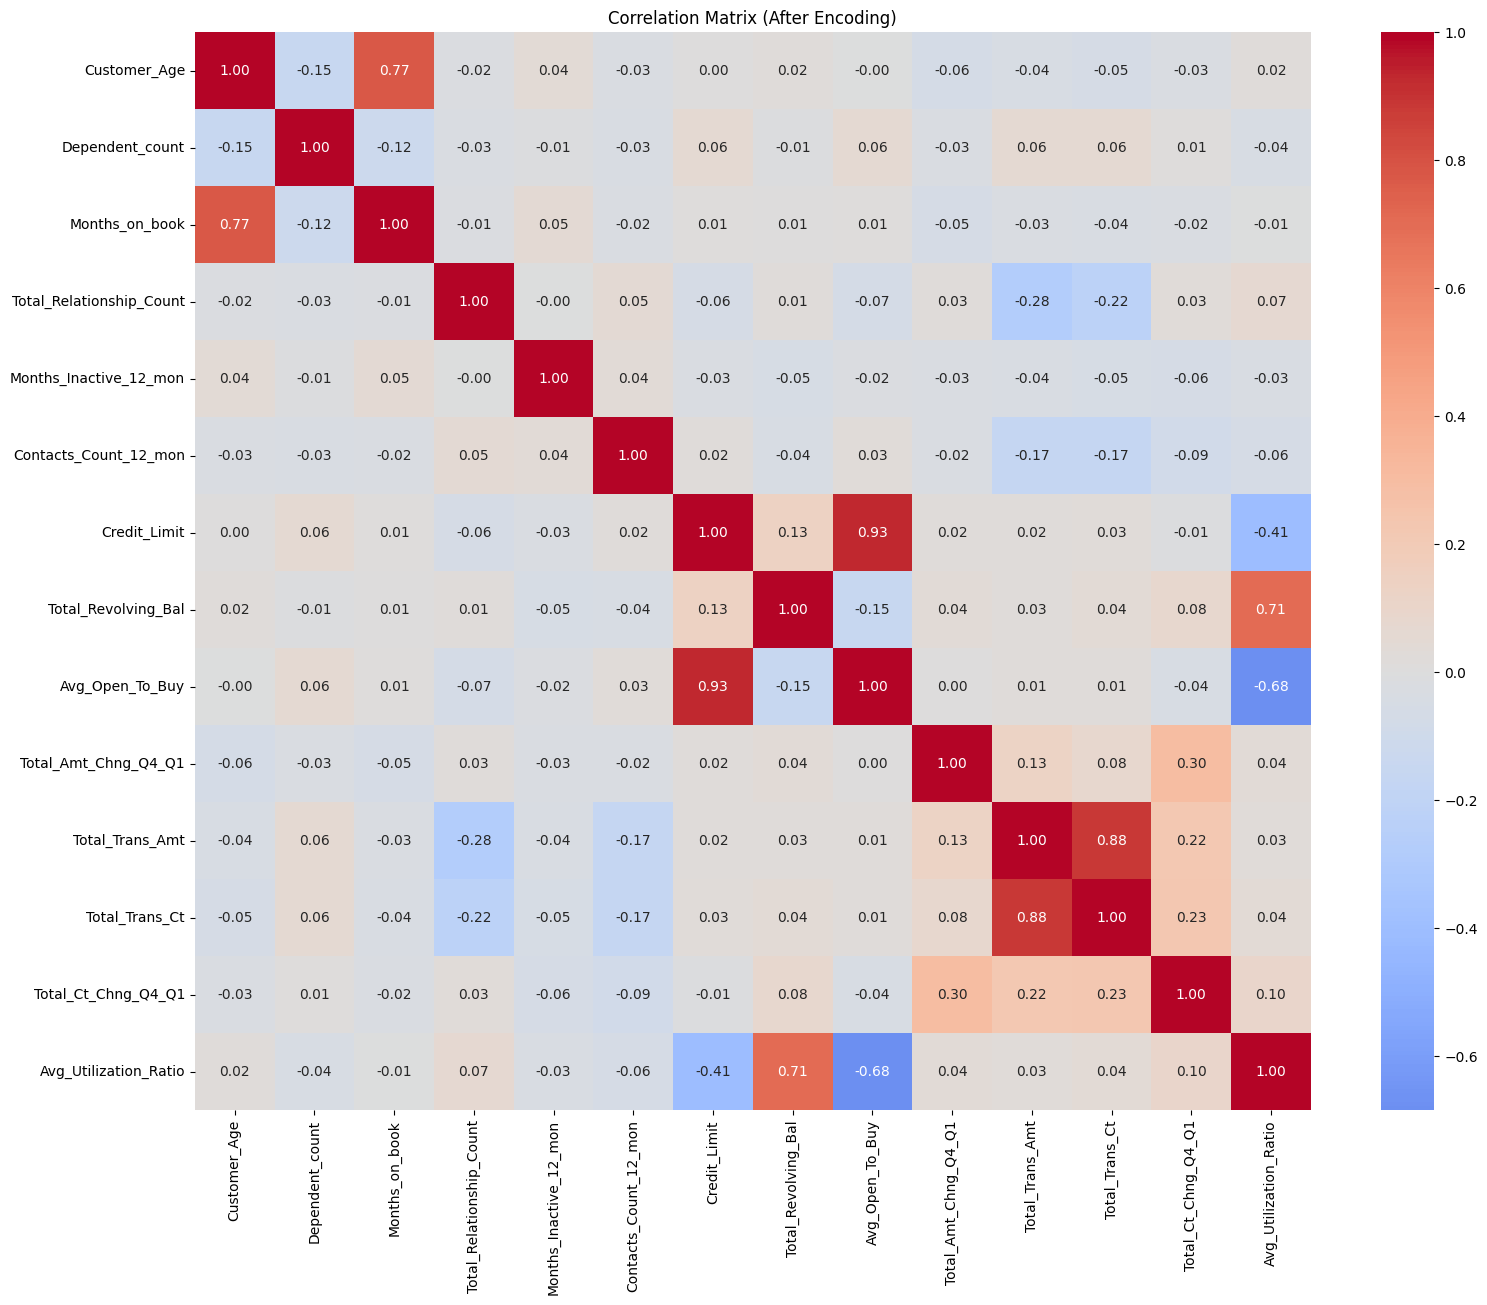

In [37]:
corr = X_transformed_df[numerical_cols].corr(method='spearman')

plt.figure(figsize=(18, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Correlation Matrix (After Encoding)")
plt.show()

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_transformed_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_transformed_df.values, i) for i in range(X_transformed_df.shape[1])]


C:\Users\plvit\AppData\Local\pypoetry\Cache\virtualenvs\churn-project-hdW-9K0Z-py3.12\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [35]:
vif_data.sort_values(by="VIF", ascending=False)

,feature,VIF
26,Avg_Open_To_Buy,inf
24,Credit_Limit,inf
25,Total_Revolving_Bal,inf
18,Customer_Age,81.973884
20,Months_on_book,57.375202
29,Total_Trans_Ct,24.302052
27,Total_Amt_Chng_Q4_Q1,14.583247
30,Total_Ct_Chng_Q4_Q1,11.595925
13,Income_Category_Less than $40K,8.999147
28,Total_Trans_Amt,8.734882


In [39]:
features

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

#### **5.3 Feature Engineering and Preprocessing Pipeline**

Let's create a preprocessing pipeline that includes:
1. Feature Engineering (Average Transaction Value)
2. Scaling of numeric features
3. Encoding of categorical features

We'll use sklearn's Pipeline to ensure consistent preprocessing across train and test sets.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer for feature engineering
class TransactionFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['Average_Transaction_Value'] = X_copy['Total_Trans_Amt'] / X_copy['Total_Trans_Ct']
        return X_copy

# Define feature groups
numeric_features = ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count',
                   'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                   'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct',
                   'Total_Trans_Amt', 'Avg_Utilization_Ratio']

categorical_features = ['Gender', 'Education_Level', 'Marital_Status',
                      'Income_Category', 'Card_Category']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'), 
         categorical_features)
    ])

# Full pipeline including feature engineering
full_pipeline = Pipeline([
    ('transaction_features', TransactionFeatureTransformer()),
    ('preprocessor', preprocessor)
])

Now let's fit our pipeline on the training data and transform both training and test sets. This ensures that:
1. The scaling parameters are learned only from training data
2. One-hot encoding is consistent across train and test sets
3. Feature engineering is applied uniformly

In [ ]:
# Fit and transform training data
X_train_transformed = full_pipeline.fit_transform(X_train)

# Transform test data using the fitted pipeline
X_test_transformed = full_pipeline.transform(X_test)

# Get feature names after transformation
cat_features = full_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = numeric_features + list(cat_features)

# Convert to DataFrame for better visualization
X_train_transformed_df = pd.DataFrame(
    X_train_transformed, 
    columns=feature_names,
    index=X_train.index
)

print("Transformed training data shape:", X_train_transformed.shape)
print("\nFirst few rows of transformed data:")
X_train_transformed_df.head()